#IRIS FLOWER CLASSIFICATION

Objective: Classify iris flower into three species (Setosa, Versicolor, Virginica) based on measurements of their petals and sepals.

###Idea


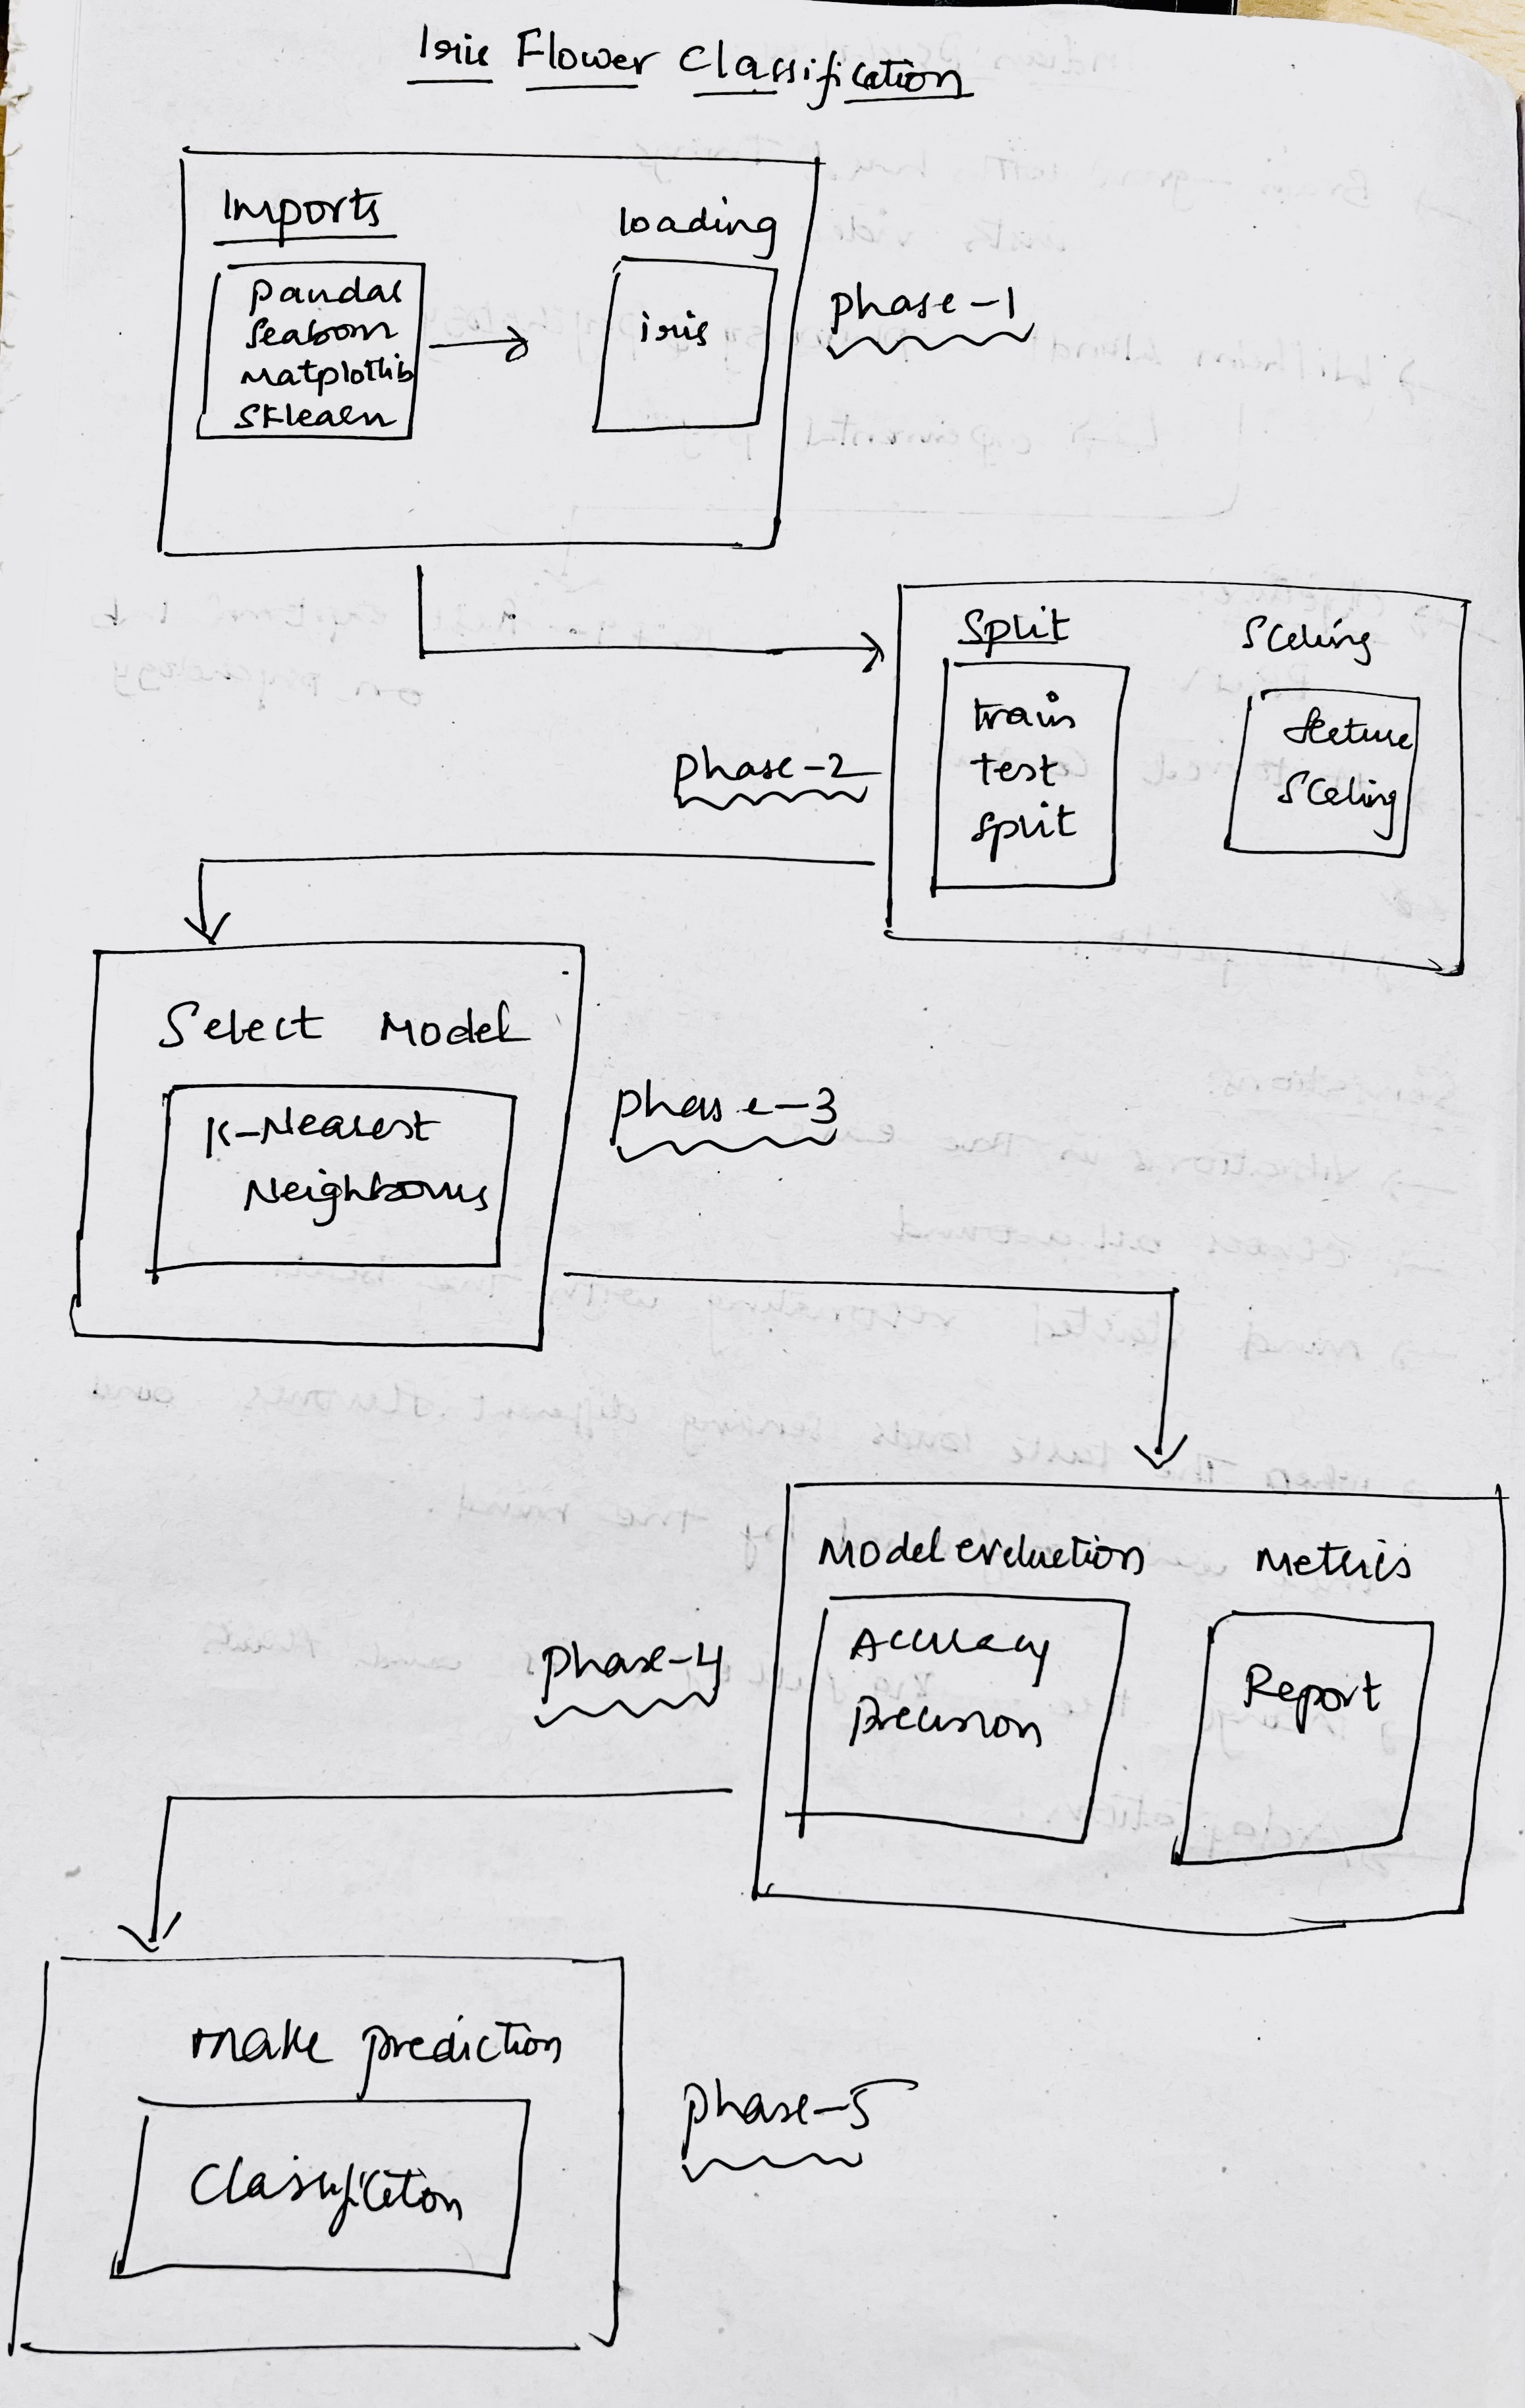

##Phase 1

Importing the libraries and loading the iris dataset imported from sklearn datasets.

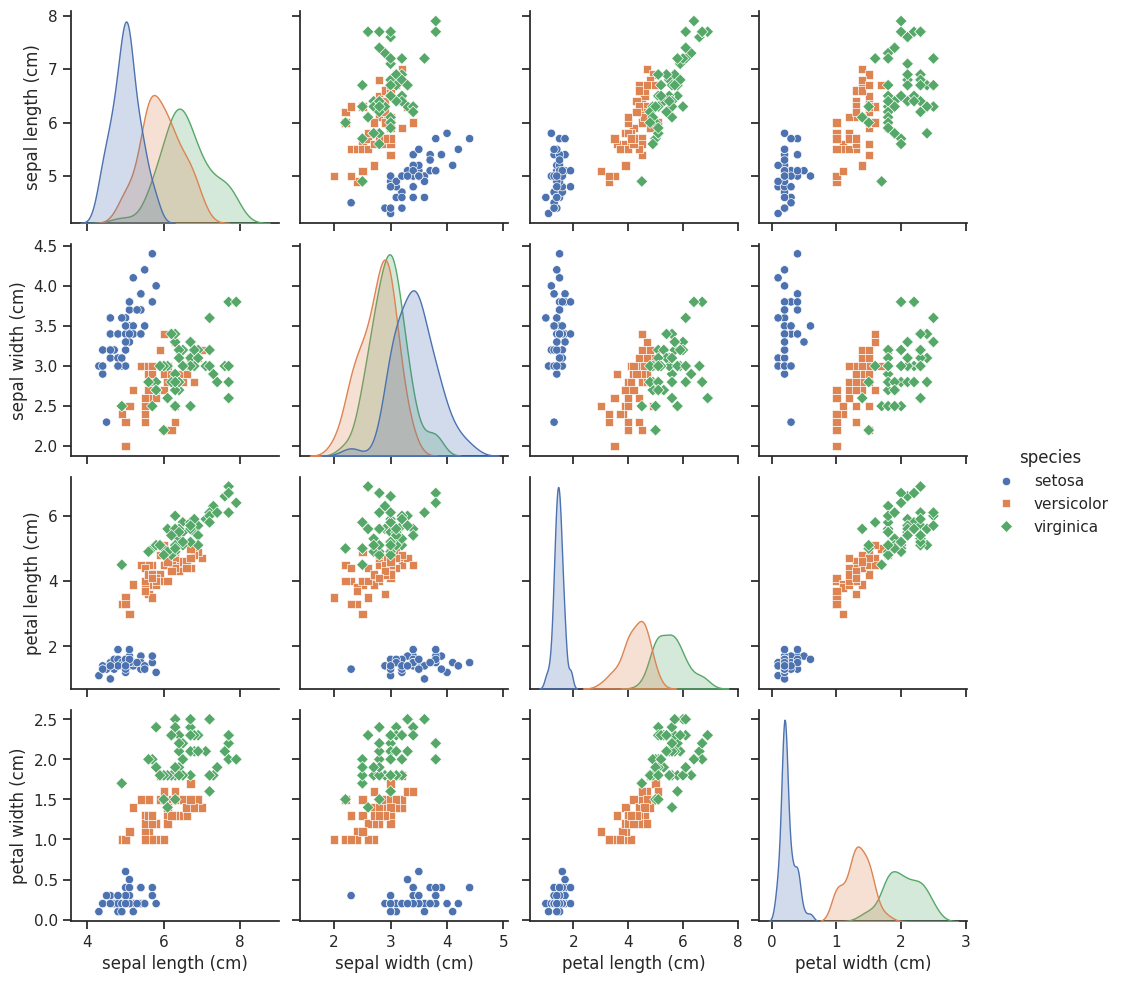

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. Loading the dataset
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Adding species column for visualization
df['species']=pd.Categorical.from_codes(iris.target, iris.target_names)

# 3. Visual Exploration (Pairplot)
# This generates a grid of scatter plots to see how species separate
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

##Phase 2

Split the data into train and test sets and perform scaling or standardization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Splitting the Data (80% Train, 20% Test)
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Scaling the Features (Standardization)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

##Phase 3

Using K Nearest Neighbours for classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Initializing the Model (k=3 usually works well for Iris)
knn=KNeighborsClassifier(n_neighbors=3)

# 2. Training the Model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

##Phase 4

Evaluation of model, calculation of metrics and detailed report

--- Key Metrics ---
Accuracy:  0.93 (Overall correctness)
Precision: 0.94 (Reliability of positive predictions)
--------------------

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



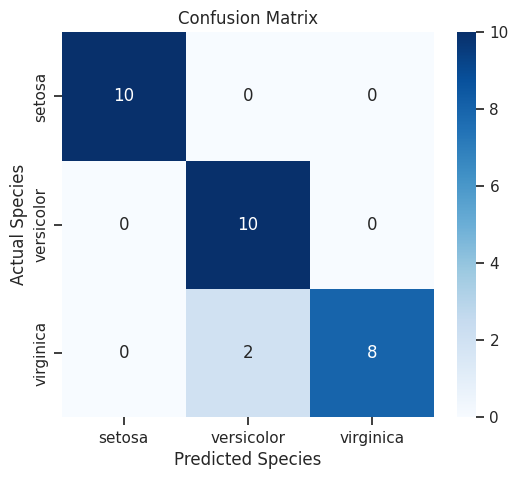

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make Predictions
y_pred=knn.predict(X_test_scaled)

# 2. Calculate Metrics
# 'macro' average treats all classes equally, which is perfect for the balanced Iris dataset
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='macro')

print(f"--- Key Metrics ---")
print(f"Accuracy:  {accuracy:.2f} (Overall correctness)")
print(f"Precision: {precision:.2f} (Reliability of positive predictions)")
print("-" * 20)

# 3. Detailed Report (Shows Precision for EACH flower type)
print("\nDetailed Classification Report:")
print(classification_report(y_test,y_pred,target_names=iris.target_names))

# 4. Visual Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.title('Confusion Matrix')
plt.show()

##Phase 5

Final Classification of flower

In [ ]:
import numpy as np

def predict_species(sepal_l, sepal_w, petal_l, petal_w):
    # Prepare the input array
    new_data=np.array([[sepal_l, sepal_w, petal_l, petal_w]])

    # Scale the input using the same scaler from Phase 2
    new_data_scaled=scaler.transform(new_data)

    # Predict
    prediction_index=knn.predict(new_data_scaled)[0]
    predicted_species=iris.target_names[prediction_index]

    return predicted_species

# Example usage:
# Input: Sepal Length, Sepal Width, Petal Length, Petal Width
result=predict_species(5.1, 3.5, 1.4, 0.2)
print(f"The model predicts this flower is: {result.upper()}")

The model predicts this flower is: SETOSA
